# 09 - Random Variables


## Introduction to Random Variables
A **random variable** is a numerical outcome of a random event. It can be either **discrete** or **continuous**.

### Types of Random Variables
1. **Discrete Random Variable**: Takes a countable, finite number of distinct values.

    - **Example**: The number of heads when flipping a coin $10$ times can be $0, 1, 2, ..., 10$.

2. **Continuous Random Variable**: Can take any value in a continuous range.

    - **Example**: The height of a person is a continuous variable since it can be any value within a reasonable range.

Each random variable has an associated **distribution function**, which describes the probability that the random variable will take a specific value (discrete) or fall within an interval (continuous).

<p align="center">
  <img src="imgs/random_variables1.jpg" alt="Alt text" width="900" height="500">
</p>

## Probability Mass Function (PMF) (for Discrete Random Variables)
- **Definition**: The PMF provides the probability that a discrete random variable takes a particular value.

- **Formula**:

$$P(X = x) = \text{Probability that } X \text{ takes the value } x$$

### Example: Rolling a Die
Consider a fair six-sided die. A die has six faces numbered from 1 to 6, and when rolled, each face is equally likely to land facing up.

The random variable $X$ represents the value that appears when rolling the die. 

Since each face is equally likely, we can represent the probability of rolling any specific number as follows:

$$P(X = 1) = P(X = 2) = P(X = 3) = P(X = 4) = P(X = 5) = P(X = 6) = \frac{1}{6} \approx 0.1667 \approx16.67\%$$

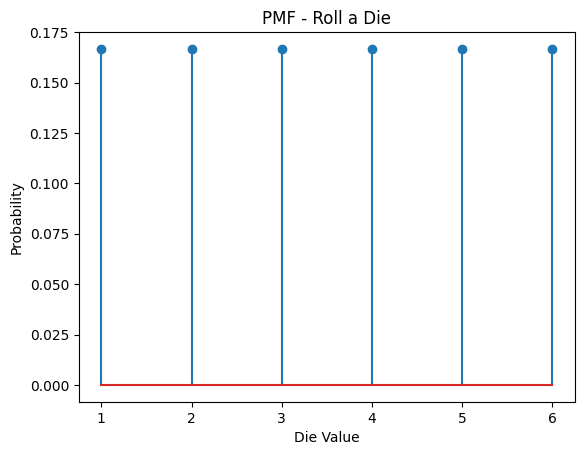

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Discrete values (1 to 6 for a die)
values = np.arange(1, 7)

# All outcomes have an equal probability (1/6 for a fair die)
pmf = [1/6] * 6

# Plotting the PMF
plt.stem(values, pmf)
plt.title("PMF - Roll a Die")
plt.xlabel("Die Value")
plt.ylabel("Probability")
plt.show()

- **Explanation**: In this case, the PMF is uniform, meaning each outcome (1 to 6) has the same probability, $\frac{1}{6} \approx 0.1667 \approx16.67\%$.